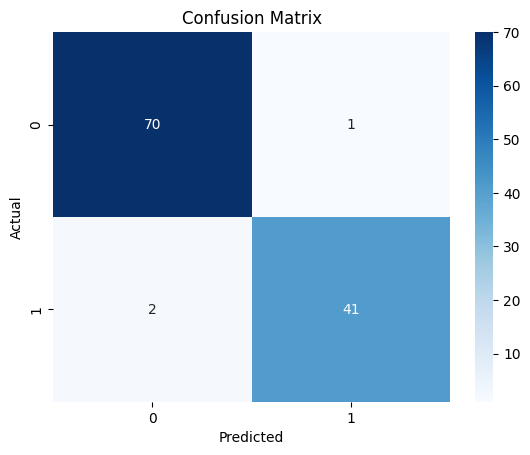

Precision: 0.98
Recall: 0.95
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



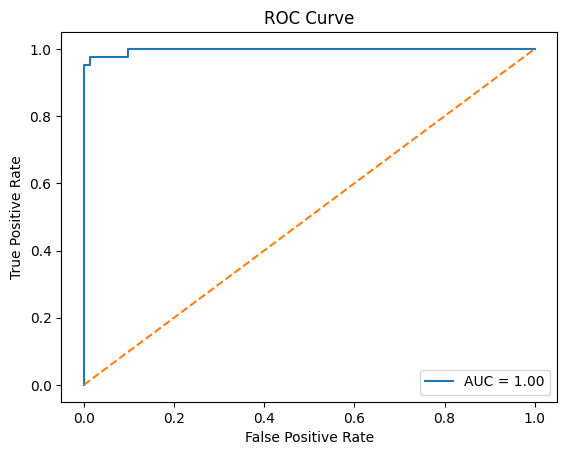

Custom Threshold Confusion Matrix (0.4):
[[70  1]
 [ 1 42]]


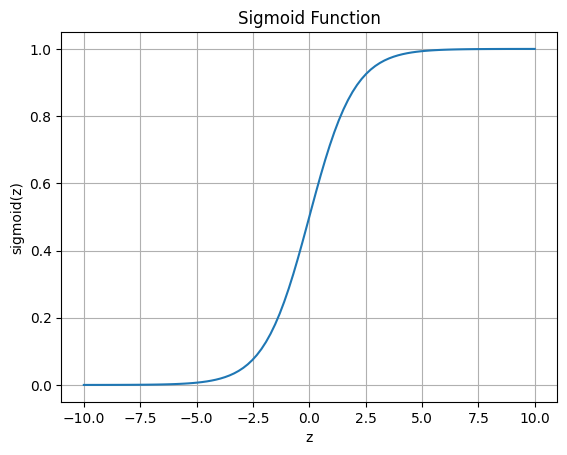

In [4]:
############################# SECTION-1 (IMPORT LIBRARIES) ##########################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_score, recall_score
)

############################# SECTION-2 (LOAD & PREPROCESS DATA) ####################################################
df = pd.read_csv("C:\\Users\\Nitin Dutt Majji\\Downloads\\B.TECH\\Elevate Labs\\data.csv")

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

############################# SECTION-3 (BUILD MODEL) ################################################################
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

############################# SECTION-4 (EVALUATION METRICS) #########################################################

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

############################# SECTION-5 (THRESHOLD TUNING EXAMPLE) ###################################################
threshold = 0.4 
y_pred_custom = (y_proba >= threshold).astype(int)

print("Custom Threshold Confusion Matrix (0.4):")
print(confusion_matrix(y_test, y_pred_custom))

############################# SECTION-6 (SIGMOID FUNCTION DEMO) ######################################################
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
